In [24]:
#Import libraries
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
#Read in the AO3 fanfiction data
AO3 = pd.read_csv('AO3.csv')

AO3

,title,mixed fandom,ships,characters,hits,kudos,published
0,Purple poison flames meet Blue fire,['Fandoms:\n鬼滅の刃 | Demon Slayer: Kimetsu no Ya...,['Dabi | Todoroki Touya & Kochou Shinobu'],"['Dabi | Todoroki Touya', 'Kochou Shinobu']",0,NaN,02 Apr 2023
1,Stuck With Babysitter Duty,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Dazai Osamu/Nakahara Chuuya (Bungou Stray Do...,"['Midoriya Izuku', 'Dazai Osamu (Bungou Stray ...",0,NaN,02 Apr 2023
2,Power in UA!!!,"['Fandoms:\nChainsaw Man (Anime), 僕のヒーローアカデミア ...","['Bakugou Katsuki/Power', 'Power & Class 1-A']","['Power (Chainsaw Man)', 'Ashido Mina', 'Iida ...",508,7.0,02 Apr 2023
3,Balance and Bondeds,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Aizawa Shouta | Eraserhead/Yamada Hizashi | ...,"['Midoriya Izuku', 'Midoriya Inko', 'Bakugou K...",11924,481.0,02 Apr 2023
4,Can't Hold Our Babies,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Bakugou Katsuki/Midoriya Izuku/Uraraka Ochak...,"['Bakugou Katsuki', 'Uraraka Ochako', 'Midoriy...",0,NaN,02 Apr 2023
...,...,...,...,...,...,...,...
1995,Seeing double,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,"['Midoriya Izuku/Usagiyama Rumi | Miruko', 'Mi...","['Midoriya Izuku', 'Class 1-A (My Hero Academi...",14960,507.0,28 Mar 2023
1996,My Idol,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Bakugou Katsuki/Midoriya Izuku'],"['Bakugou Katsuki', 'Midoriya Izuku']",3348,234.0,28 Mar 2023
1997,Woodland Paths,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Midoriya Izuku & Yagi Toshinori | All Might'...,"['Midoriya Izuku', 'Yagi Toshinori | All Might...",4604,244.0,28 Mar 2023
1998,Boku No Hero Academia: Ones Way,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,[],"['Mia Ikati', 'Rue Achlys', 'Ryuuji Takao', 'I...",44,NaN,28 Mar 2023


In [3]:
#Some basic stats from the two numerical values, hits and kudos
AO3.describe()

,hits,kudos
count,2000.000000,1900.000000
mean,8665.995500,264.750526
std,39620.134538,839.730126
min,0.000000,1.000000
25%,146.250000,12.000000
50%,643.500000,47.000000
75%,3499.000000,176.000000
max,980853.000000,15449.000000


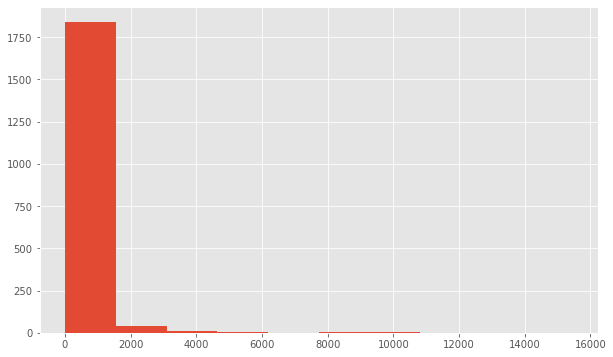

In [5]:
#Basic histogram of kudos variable
plt.hist(AO3['kudos'])
plt.show() 

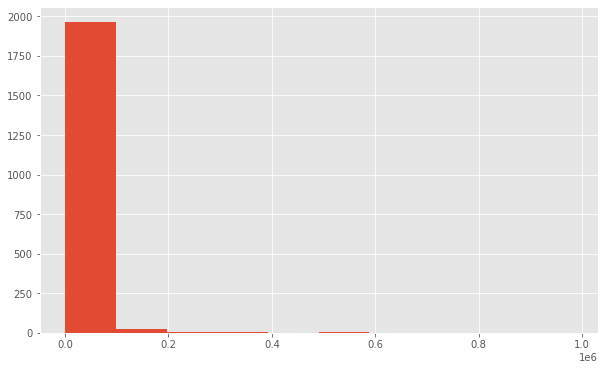

In [6]:
#Basic histogram of hits variable
plt.hist(AO3['hits'])
plt.show() 

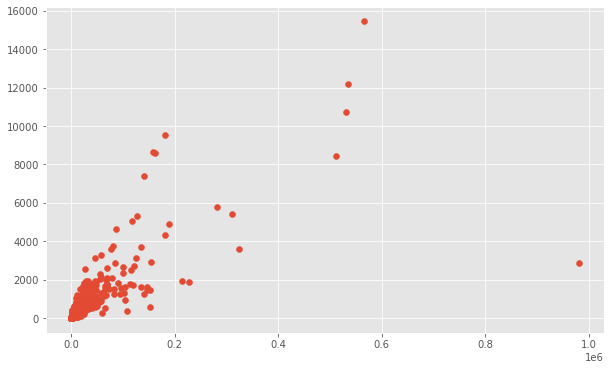

In [19]:
#Scatter plot with hits as x and kudos as y
plt.scatter(AO3['hits'],AO3['kudos']);

In [9]:
#Subset dataframe to only have hits and kudos data
AO3_hits_kudos = AO3[AO3.columns[[4,5]]]
AO3_hits_kudos

,hits,kudos
0,0,NaN
1,0,NaN
2,508,7.0
3,11924,481.0
4,0,NaN
...,...,...
1995,14960,507.0
1996,3348,234.0
1997,4604,244.0
1998,44,NaN


In [39]:
#Calculate correlation between hits and kudos. Pretty highly correlated
AO3_hits_kudos.corr()

,hits,kudos
hits,1.000000,0.780337
kudos,0.780337,1.000000


In [26]:
#This is to scale the data so that it works better for KMeans clustering
scaler = MinMaxScaler() #Make a MinMaxScaler object

#Scales the sliced dataset and returns the dataset with scaled data between 0 and 1.0
scaler.fit(AO3_hits_kudos) 
X = scaler.transform(AO3_hits_kudos)
X[np.isnan(X)] = 0



array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [5.17916548e-04, 3.88399793e-04],
       ...,
       [4.69387360e-03, 1.57301916e-02],
       [4.48589136e-05, 0.00000000e+00],
       [2.85465814e-05, 0.00000000e+00]])

In [32]:
#Wanted to get rid of the 5 biggest outliers to see if that affected clustering in any way
AO3_hits_kudos_reduced = AO3_hits_kudos[AO3_hits_kudos['hits'] < 400000]
AO3_hits_kudos_reduced

,hits,kudos
0,0,NaN
1,0,NaN
2,508,7.0
3,11924,481.0
4,0,NaN
...,...,...
1995,14960,507.0
1996,3348,234.0
1997,4604,244.0
1998,44,NaN


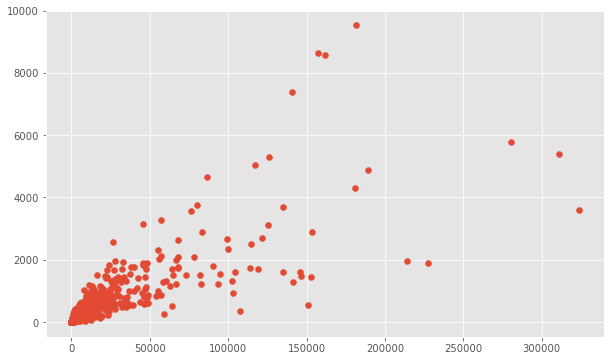

In [33]:
#Scatter plot without the outliers
plt.scatter(AO3_hits_kudos_reduced['hits'],AO3_hits_kudos_reduced['kudos']);

In [34]:
#Scaled the non-outlier data
scaler.fit(AO3_hits_kudos_reduced) 
XX = scaler.transform(AO3_hits_kudos_reduced)
XX[np.isnan(XX)] = 0
XX

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.56963558e-03, 6.29987400e-04],
       ...,
       [1.42255949e-02, 2.55144897e-02],
       [1.35952688e-04, 0.00000000e+00],
       [8.65153472e-05, 0.00000000e+00]])

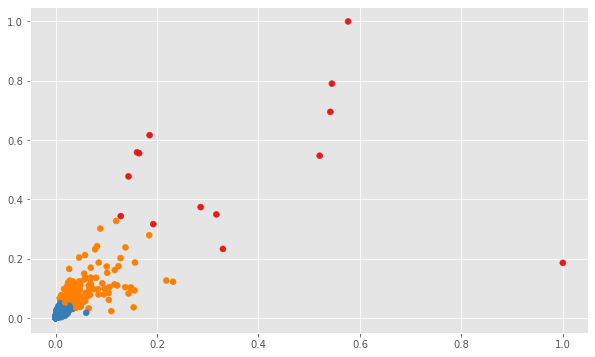

In [27]:
#Running the KMeans model on first data. Initially ran with 3 clusters in mind, but that parameter can change
y_pred = KMeans(n_clusters=3, n_init=1, init='random', max_iter=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

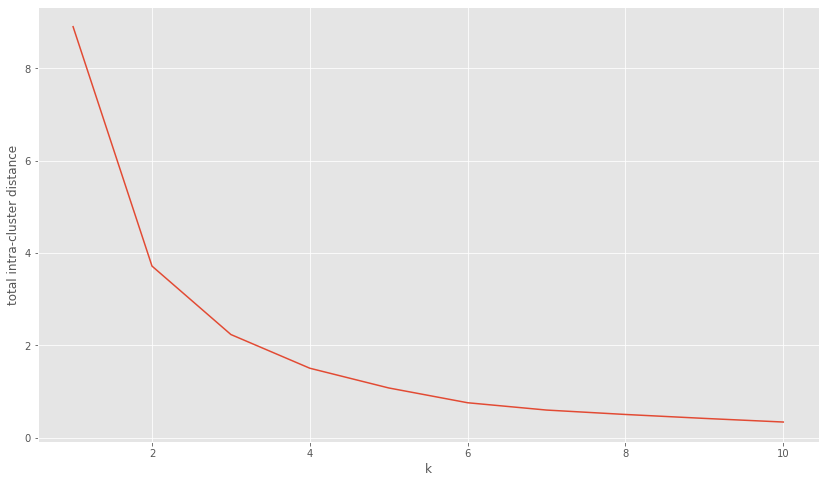

In [30]:
#Grahing intra-cluster distance. You can use the "elbow method" to determine optimal amount of clusters
ks = range(1,11)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(X)
    scores.append(-model.score(X))
    
    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show();    

[0.9528620213437995, 0.8716200594699518, 0.8579136808649471, 0.8582495399018898, 0.7998512627569924]


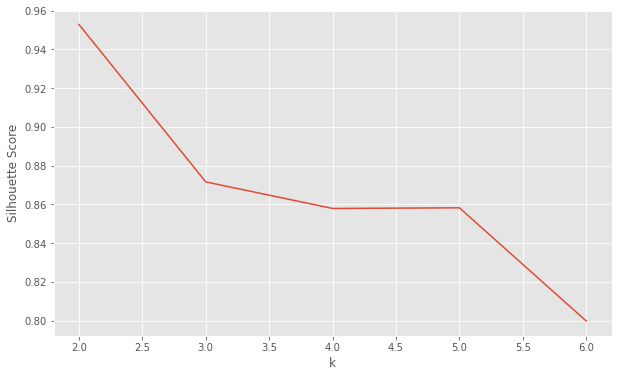

In [31]:
#Graphing silhouette score. Just another way to determine the amount of clusters for highest accuracy
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
print(silhouette_avg)    
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

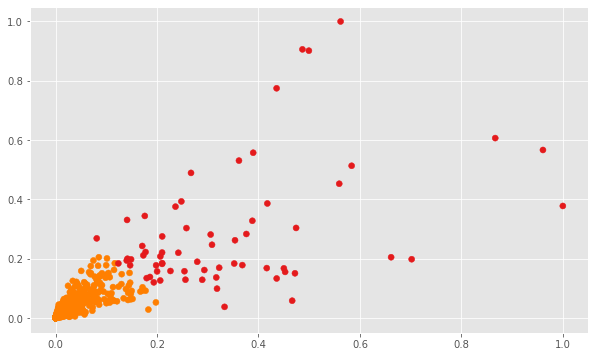

In [38]:
#KMeans clustering with non-outlier data
y_pred2 = KMeans(n_clusters=2, n_init=1, init='random', max_iter=5).fit_predict(XX)
plt.scatter(XX[:, 0], XX[:, 1], c=y_pred2,  marker="o", cmap=cmap);

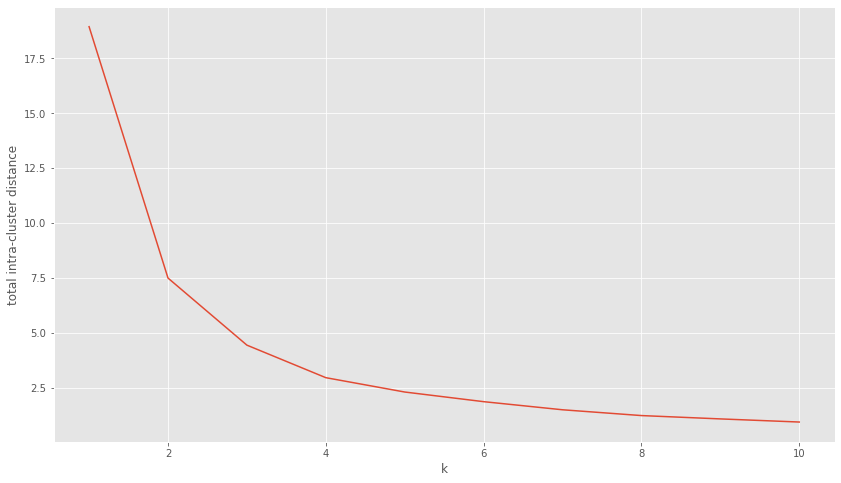

In [36]:
#Same idea as before
ks = range(1,11)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred2 = model.fit_predict(XX)
    scores.append(-model.score(XX))
    
    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show(); 

[0.9104693836799069, 0.8587571990986024, 0.8115232948698232, 0.8121171410292469, 0.7693160154407631]


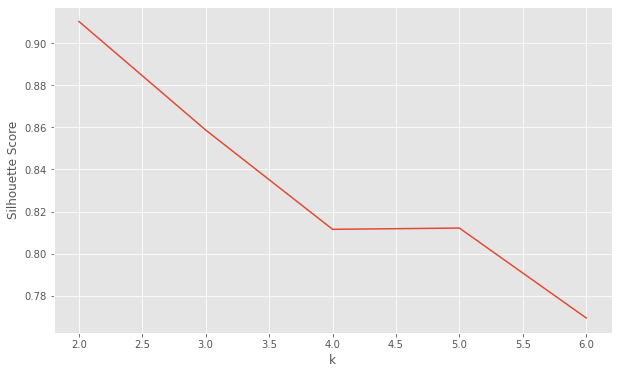

In [37]:
#Same idea as before
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(XX)
    silhouette_avg.append(silhouette_score(XX, cluster_labels))
    
print(silhouette_avg)    
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()